## Pasos previos
Antes de comenzar a realizar las diferentes tareas, es necesario importar las librerías que serán empleadas; OpenCV, NumPy y Matplotlib.

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## Primera tarea:
En esta primera actividad, generamos un tablero de 800x800 píxeles generando una matriz de ceros, gracias a NumPy. Tras esto, realizamos un bucle que rellena cada una de las 8 filas, declarando un coeficiente "c" en aquellas filas impares para sumar o no 100 píxeles al inicio de la fila, generando así que los recuadros blancos comiencen un recuadro más alejado del borde izquierdo en las filas impares. Otro bucle interno se encarga de generar esos 4 recuadros blancos que conforman cada fila.

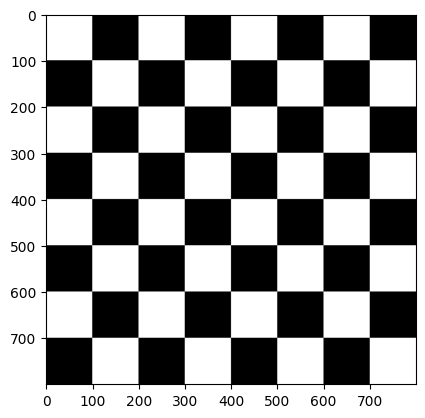

In [179]:
tablero = np.zeros((800,800,1), dtype=np.uint8,)
for j in range(8):
    if j % 2 != 0:
        c = 1
    else:
        c = 0
    for i in range(4):
        tablero[j*100 + 0:j*100 +100, c*100+0+200*i:c*100+100+200*i] = 255
plt.imshow(tablero, cmap='gray') 
plt.show()

## Segunda tarea:
Esta segunda tarea la hemos realizado de dos modos; con los colores elegidos manualmente, y con colores aleatorios gracias a una función auxiliar que genera una tupla con 3 valores de 0 a 255, que posteriormente se emplea como color. Lo realizado en este apartado consiste en generar manualmente cada uno de los rectángulos, eligiendo en qué posición de la imagen de 800x800 aparecerá cada rectángulo y en qué color.

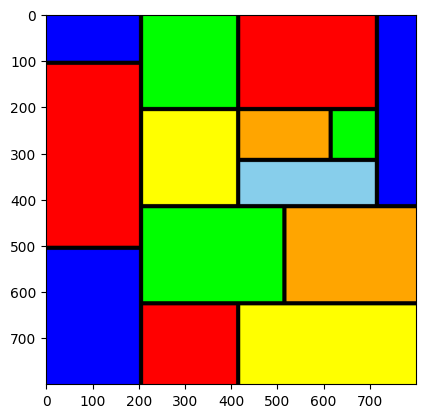

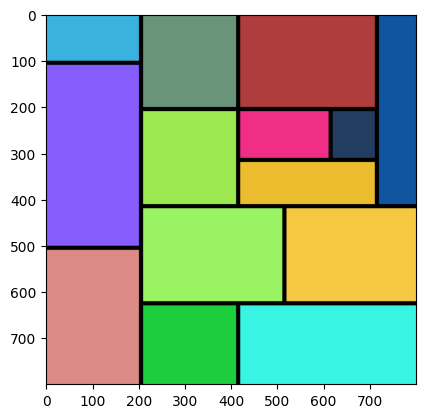

In [180]:
mondrian = np.zeros((800, 800, 3), dtype=np.uint8)
# Aquí con colores elegidos a mano
mondrian = cv2.rectangle(mondrian, (0,0), (200,100), (0,0,255), -1)
mondrian = cv2.rectangle(mondrian, (210,0), (410,200), (0,255,0), -1)
mondrian = cv2.rectangle(mondrian, (420,0), (710,200), (255,0,0), -1)
mondrian = cv2.rectangle(mondrian, (720,0), (800,410), (0,0,255), -1)
mondrian = cv2.rectangle(mondrian, (0,110), (200,500), (255,0,0), -1)
mondrian = cv2.rectangle(mondrian, (210,210), (410,410), (255,255,0), -1)
mondrian = cv2.rectangle(mondrian, (210,420), (510,620), (0,255,0), -1)
mondrian = cv2.rectangle(mondrian, (0,510), (200,800), (0,0,255), -1)
mondrian = cv2.rectangle(mondrian, (210,630), (410,800), (255,0,0), -1)
mondrian = cv2.rectangle(mondrian, (420,630), (800,800), (255,255,0), -1)
mondrian = cv2.rectangle(mondrian, (420,210), (610,310), (255,165,0), -1)
mondrian = cv2.rectangle(mondrian, (420,320), (710,410), (135,206,235), -1)
mondrian = cv2.rectangle(mondrian, (620,210), (710,310), (0,255,0), -1)
mondrian = cv2.rectangle(mondrian, (520,420), (800,620), (255,165,0), -1)

def rand_color():
    return tuple(np.random.randint(0,255, size=3).tolist())

plt.imshow(mondrian)
plt.show()
# Aquí con colores aleatorios
mondrian = cv2.rectangle(mondrian, (0,0), (200,100), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (210,0), (410,200), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (420,0), (710,200), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (720,0), (800,410), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (0,110), (200,500), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (210,210), (410,410), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (210,420), (510,620), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (0,510), (200,800), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (210,630), (410,800), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (420,630), (800,800), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (420,210), (610,310), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (420,320), (710,410), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (620,210), (710,310), rand_color(), -1)
mondrian = cv2.rectangle(mondrian, (520,420), (800,620), rand_color(), -1)

plt.imshow(mondrian)
plt.show()

## Tercera tarea:
Para esta actividad separamos los 3 canales de la imagen, y sencillamente generamos una modificación de la saturación del canal rojo, haciendo que aparezcan ciertas líneas sobre la imagen. Para visualizarlo lo hemos hecho de dos formas, primero hemos fusionado los 3 canales de nuevo con la función merge y hemos mostrado una imagen completa con el canal rojo modificado, y luego hemos mostrado los 3 canales por separado en horizontal, como mostraba el ejemplo en el cuaderno original.

In [13]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        #modificacion comienzo del canal rojo
         # Guardamos copia del rojo original
        r_original = r.copy()

        r = 255 -r   # saturación automática en 255

        for i in range(0, r.shape[0], 40):  
            r[i:i+10, :] = r_original[i:i+10, :]

        cv2.imshow('RGB', cv2.merge((b, g, r)))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        #modificacion comienzo del canal rojo
         # Guardamos copia del rojo original
        r_original = r.copy()

        r = 255 -r   # saturación automática en 255

        for i in range(0, r.shape[0], 40):  
            r[i:i+10, :] = r_original[i:i+10, :]

        h, w, c = frame.shape
        collage = np.hstack((r, g, b))

        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

## Cuarta tarea:
En esta cuarta tarea, procesamos el vídeo de la webcam y buscamos aquellos píxeles más claro y más oscuro para rodearlos con un círculo y así mostrar estas dos zonas. Para ello, empleamos la función minMaxLoc de OpenCV, que, tras pasarle un color (en nuestro caso el color gris), encuentra el píxel más claro y más oscuro de ese color, y devuelve sus localizaciones junto con sus valores. Finalmente, empleando la función circle generamos un círculo azul en el más oscuro y un círculo amarillo en el más claro.

In [14]:
vid = cv2.VideoCapture(0)
lanzado = 0 #bandera para primer fotograma
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Muestra fotograma
        cv2.imshow('Cam', frame)  
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Encontramos el píxel más oscuro y más claro
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray)

        # Dibujamos círculos
        cv2.circle(frame, minLoc, 10, (255, 0, 0), 2)   # azul = más oscuro
        cv2.circle(frame, maxLoc, 10, (0, 255, 255), 2) # amarillo = más claro
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

## Quinta tarea:
En esta última tarea, crearemos un popart sobre el vídeo en tiempo real de la cámara. Este popart está inspirado en la época de los 50-70s, con artistas como Andy Warhol o Roy Lichtenstein liderando el movimiento. Para este apartado, se emplean 16 combinaciones de desplazamiento de matiz (hue shift) y de factor de saturación, que nos ayudarán a crear los efectos. Luego, iremos colocando dentro de collage (una matriz del tamaño del frame abierto por OpenCV) pequeños frames que son una cuarta parte del frame original, cada uno de ellos con una saturación y tono calculados empleando los hue_shift y sat_factor obtenidos en el primer bucle. Finalmente generamos un rectángulo como borde y mostramos el collage, que muestra un frame con la misma imagen repetida 16 veces pero con valores de tono y saturación diferentes. 

In [15]:
import cv2
import numpy as np

vid = cv2.VideoCapture(0)
if not vid.isOpened():
    raise RuntimeError("No se puede abrir la cámara.")

# Resoluciones base
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)) // 4
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)) // 4

cols, rows = 4, 4
canvas_w, canvas_h = w * cols, h * rows
collage = np.zeros((canvas_h, canvas_w, 3), dtype=np.uint8)

# Definimos 16 combinaciones de (hue_shift, saturation_factor)
effects = []
for i in range(rows):
    for j in range(cols):
        hue_shift = (i * 60 + j * 20) % 180     # variamos el tono
        sat_factor = 0.5 + (i * cols + j) * 0.15  # variamos la saturación
        effects.append((hue_shift, sat_factor))

while True:
    ret, frame = vid.read()
    if not ret:
        break

    frame_small = cv2.resize(frame, (w, h), interpolation=cv2.INTER_AREA)

    idx = 0
    for i in range(rows):
        for j in range(cols):
            hue_shift, sat_factor = effects[idx]
            idx += 1

            # Convertimos a HSV
            hsv = cv2.cvtColor(frame_small, cv2.COLOR_BGR2HSV).astype(np.float32)

            # Cambiamos el tono (Hue)
            hsv[:,:,0] = (hsv[:,:,0] + hue_shift) % 180

            # Ajustamos la saturación
            hsv[:,:,1] = np.clip(hsv[:,:,1] * sat_factor, 0, 255)

            # Convertimos de nuevo a BGR
            tile = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)

            # Colocamos en el collage
            collage[i*h:(i+1)*h, j*w:(j+1)*w] = tile

    # Dibujar borde general
    cv2.rectangle(collage, (0,0), (canvas_w-1, canvas_h-1), (0,0,0), 6)

    cv2.imshow("Cam", collage)
    if cv2.waitKey(20) == 27:  # ESC
        break

vid.release()
cv2.destroyAllWindows()
